<a href="https://colab.research.google.com/github/MarianaDuartee/ProjetoFinal/blob/main/df_final_com_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fsspec

In [ ]:
pip install gcsfs

In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

import plotly.express as px 
import plotly.graph_objs as pgo 
from plotly.subplots import make_subplots 

import seaborn as sns

In [12]:
from google.cloud import storage
serviceaccount = '/content/soulcode-projeto-final-4b88bea6e07a.json'
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = serviceaccount

df_final = pd.read_csv('gs://data_lake_ingest_data/3_output/TabelaFinal',sep=',')
df_final

,UF,Ano,populacao_estimada,Total_Ocorrencias,Total_Vitimas,Taxa_Analfabetismo,Investimentos,TotalOcorrencias_Roubos,Media_Freq_Escolar,TaxaDesemprego
0,Piauí,2016,3212180,704,704,17.2,8.044295e+08,5726,10.5,9.43
1,Pernambuco,2016,9410336,4314,4481,12.8,2.657598e+09,20537,10.5,14.55
2,Amazonas,2016,4001667,1150,1154,6.9,1.604732e+09,6285,10.5,13.58
3,Mato Grosso do Sul,2016,2682386,609,639,6.3,1.459525e+09,4779,11.0,7.68
4,Roraima,2016,514229,136,145,6.6,4.089342e+08,1516,11.0,8.80
...,...,...,...,...,...,...,...,...,...,...
95,Goiás,2019,7018354,1699,1756,5.1,3.839270e+09,13220,11.8,10.60
96,São Paulo,2019,45919049,3068,3200,2.6,1.232196e+10,137937,12.3,12.45
97,Alagoas,2019,3337357,1051,1094,17.1,1.159159e+09,3828,10.4,14.90
98,Tocantins,2019,1572866,326,381,9.7,1.119190e+09,2271,11.4,10.82


In [13]:
df_final.UF = df_final.UF.map({ 'Rondônia' : 11, 'Acre' : 12, 'Amazonas' : 13,
                               'Roraima': 14, 'Pará': 15, 'Amapá': 16, 'Tocantins': 17,
                               'Maranhão': 21, 'Piauí': 22, 'Ceará': 23, 'Rio Grande do Norte': 24,
                               'Paraíba': 25, 'Pernambuco': 26, 'Alagoas': 27, 'Sergipe': 28,
                               'Bahia': 29, 'Minas Gerais': 31, 'Espírito Santo': 32,
                               'Rio de Janeiro': 33, 'São Paulo': 35, 'Paraná': 41,
                               'Santa Catarina': 42, 'Rio Grande do Sul': 43, 'Mato Grosso do Sul': 50,
                               'Mato Grosso': 51, 'Goiás': 52, 'Distrito Federal': 53   
                               })

In [14]:
df_final.head()

,UF,Ano,populacao_estimada,Total_Ocorrencias,Total_Vitimas,Taxa_Analfabetismo,Investimentos,TotalOcorrencias_Roubos,Media_Freq_Escolar,TaxaDesemprego
0,22,2016,3212180,704,704,17.2,8.044295e+08,5726,10.5,9.43
1,26,2016,9410336,4314,4481,12.8,2.657598e+09,20537,10.5,14.55
2,13,2016,4001667,1150,1154,6.9,1.604732e+09,6285,10.5,13.58
3,50,2016,2682386,609,639,6.3,1.459525e+09,4779,11.0,7.68
4,14,2016,514229,136,145,6.6,4.089342e+08,1516,11.0,8.80


In [15]:
scaler = MinMaxScaler()
numeric_df = df_final.drop(["UF", "Ano"],axis=1)
scaled_df = pd.DataFrame(scaler.fit_transform(numeric_df.values),columns=numeric_df.columns)
scaled_df["UF"] = df_final["UF"]
scaled_df["Ano"] = df_final["Ano"]
#scaled_genre_df.drop("genres",axis=1).keys()

In [17]:
scaled_df

,populacao_estimada,Total_Ocorrencias,Total_Vitimas,Taxa_Analfabetismo,Investimentos,TotalOcorrencias_Roubos,Media_Freq_Escolar,TaxaDesemprego,UF,Ano
0,0.059420,0.089973,0.083959,0.872832,0.041148,0.028799,0.275862,0.237757,22,2016
1,0.195929,0.661809,0.651247,0.618497,0.188863,0.103292,0.275862,0.601136,26,2016
2,0.076808,0.160621,0.151547,0.277457,0.104940,0.031611,0.275862,0.532292,13,2016
3,0.047752,0.074925,0.074196,0.242775,0.093366,0.024036,0.448276,0.113556,50,2016
4,0.000000,0.000000,0.000000,0.260116,0.009624,0.007625,0.448276,0.193045,14,2016
...,...,...,...,...,...,...,...,...,...,...
95,0.143247,0.247584,0.241965,0.173410,0.283053,0.066491,0.724138,0.320795,52,2019
96,1.000000,0.464438,0.458847,0.028902,0.959203,0.693764,0.896552,0.452094,35,2019
97,0.062177,0.144939,0.142535,0.867052,0.069424,0.019253,0.241379,0.625976,27,2019
98,0.023316,0.030097,0.035446,0.439306,0.066238,0.011422,0.586207,0.336409,17,2019


In [19]:
mean_dados = np.mean(scaled_df, axis=0)
M = scaled_df - mean_dados

#Calculando a matriz de covariancia
C = M.T.dot(M) / (scaled_df.shape[0] - 1)

#Auto-valores e auto-vetores
autovalores, autovetores = np.linalg.eig(C)

print("Auto-valores: ", autovalores)
print("Auto-vetores: ", autovetores)

Auto-valores:  [1.55931300e+02 1.26905646e+00 1.98278166e-01 1.08612690e-01
 3.35998204e-02 3.05690888e-02 1.05658173e-03 1.45546521e-03
 4.49163233e-03 6.78781198e-03]
Auto-vetores:  [[ 4.22145035e-03  3.82257097e-05 -3.90665107e-01 -1.54952031e-01
  -3.19255682e-01  2.56899866e-01  2.84596535e-01  6.92121547e-01
  -3.08728055e-01 -9.52118225e-03]
 [ 2.54660635e-03 -3.36707226e-02 -5.02777775e-01  2.66655025e-01
   3.03484842e-01 -7.51712988e-02  5.97144766e-01 -3.95249499e-01
  -2.13811264e-01  1.36734547e-01]
 [ 2.57079347e-03 -2.74293032e-02 -4.79930878e-01  2.96471826e-01
   4.40587084e-01 -1.25759546e-01 -5.97086634e-01  3.06011947e-01
   2.95277186e-02  1.41604184e-01]
 [-9.87731518e-03 -1.74374279e-02  1.06016029e-01  6.92926274e-01
  -3.69094932e-01  4.44626164e-01 -2.32095968e-02 -2.96689881e-02
   1.69981133e-01  3.79441881e-01]
 [ 5.97949165e-03  8.28987220e-04 -4.98163046e-01 -2.09661057e-01
  -1.85617579e-01  2.18046072e-01  4.63719388e-04 -1.73240015e-01
   7.28955748e-0

In [20]:
#Ordenar os auto-valores do maior para o menor
pares_auto = [(np.abs(autovalores[i]), autovetores[:,1]) for i in range (len(autovalores))]

pares_auto.sort()
pares_auto.reverse()

#Calcular a variância explicada e a variância
total = sum(autovalores)

var_exp = [(i/total)*100 for i in sorted(autovalores, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

In [21]:
#Visualizar as informações
x = ['PC %s' %i for i in range(1, len(autovalores)+1)]
df_temp = pd.DataFrame(
    {
        "Auto-valores": autovalores,
     "Cum_var_exp": cum_var_exp,
     "Var_exp": var_exp,
     "Componente": x
    }
)

print(df_temp)
print('')
print("Auto-vetores")
for autovetor in [p[1] for p in pares_auto]:
  print(autovetor)
print('')

   Auto-valores  Cum_var_exp    Var_exp Componente
0    155.931300    98.950468  98.950468       PC 1
1      1.269056    99.755782   0.805314       PC 2
2      0.198278    99.881605   0.125823       PC 3
3      0.108613    99.950528   0.068923       PC 4
4      0.033600    99.971850   0.021322       PC 5
5      0.030569    99.991248   0.019398       PC 6
6      0.001057    99.995556   0.004307       PC 7
7      0.001455    99.998406   0.002850       PC 8
8      0.004492    99.999330   0.000924       PC 9
9      0.006788   100.000000   0.000670      PC 10

Auto-vetores
[ 3.82257097e-05 -3.36707226e-02 -2.74293032e-02 -1.74374279e-02
  8.28987220e-04 -1.04139367e-02  5.37577766e-02  1.42469869e-02
 -3.92165298e-04  9.97300198e-01]
[ 3.82257097e-05 -3.36707226e-02 -2.74293032e-02 -1.74374279e-02
  8.28987220e-04 -1.04139367e-02  5.37577766e-02  1.42469869e-02
 -3.92165298e-04  9.97300198e-01]
[ 3.82257097e-05 -3.36707226e-02 -2.74293032e-02 -1.74374279e-02
  8.28987220e-04 -1.04139367e-02

In [22]:
pca = PCA(n_components=2)
pca.fit(scaled_df)

PCA(n_components=2)

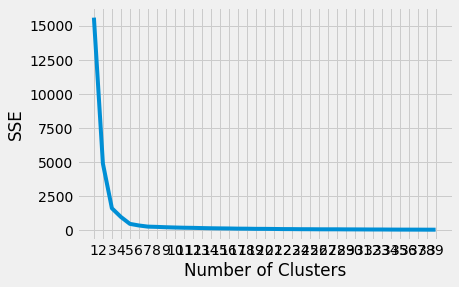

In [24]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 40,
   "max_iter": 300,
   "random_state": 42,
   }
sse = []
for k in range(1, 40):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_df)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 40), sse)
plt.xticks(range(1, 40))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
!pip install --upgrade kneed

In [26]:
import kneed
from kneed import KneeLocator
kl = KneeLocator(
 range(1, 40), sse, curve="convex", direction="decreasing"
 )

kl.elbow

5

In [27]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
kmeans.fit(pca.transform(scaled_df))
scaled_df["cluster"] = kmeans.labels_

In [28]:
scaled_df

,populacao_estimada,Total_Ocorrencias,Total_Vitimas,Taxa_Analfabetismo,Investimentos,TotalOcorrencias_Roubos,Media_Freq_Escolar,TaxaDesemprego,UF,Ano,cluster
0,0.059420,0.089973,0.083959,0.872832,0.041148,0.028799,0.275862,0.237757,22,2016,1
1,0.195929,0.661809,0.651247,0.618497,0.188863,0.103292,0.275862,0.601136,26,2016,1
2,0.076808,0.160621,0.151547,0.277457,0.104940,0.031611,0.275862,0.532292,13,2016,0
3,0.047752,0.074925,0.074196,0.242775,0.093366,0.024036,0.448276,0.113556,50,2016,2
4,0.000000,0.000000,0.000000,0.260116,0.009624,0.007625,0.448276,0.193045,14,2016,0
...,...,...,...,...,...,...,...,...,...,...,...
95,0.143247,0.247584,0.241965,0.173410,0.283053,0.066491,0.724138,0.320795,52,2019,2
96,1.000000,0.464438,0.458847,0.028902,0.959203,0.693764,0.896552,0.452094,35,2019,4
97,0.062177,0.144939,0.142535,0.867052,0.069424,0.019253,0.241379,0.625976,27,2019,1
98,0.023316,0.030097,0.035446,0.439306,0.066238,0.011422,0.586207,0.336409,17,2019,0


In [29]:
df_final_back = df_final

In [30]:
df_final_back['cluster'] = scaled_df["cluster"]

In [31]:
df_final_back

,UF,Ano,populacao_estimada,Total_Ocorrencias,Total_Vitimas,Taxa_Analfabetismo,Investimentos,TotalOcorrencias_Roubos,Media_Freq_Escolar,TaxaDesemprego,cluster
0,22,2016,3212180,704,704,17.2,8.044295e+08,5726,10.5,9.43,1
1,26,2016,9410336,4314,4481,12.8,2.657598e+09,20537,10.5,14.55,1
2,13,2016,4001667,1150,1154,6.9,1.604732e+09,6285,10.5,13.58,0
3,50,2016,2682386,609,639,6.3,1.459525e+09,4779,11.0,7.68,2
4,14,2016,514229,136,145,6.6,4.089342e+08,1516,11.0,8.80,0
...,...,...,...,...,...,...,...,...,...,...,...
95,52,2019,7018354,1699,1756,5.1,3.839270e+09,13220,11.8,10.60,2
96,35,2019,45919049,3068,3200,2.6,1.232196e+10,137937,12.3,12.45,4
97,27,2019,3337357,1051,1094,17.1,1.159159e+09,3828,10.4,14.90,1
98,17,2019,1572866,326,381,9.7,1.119190e+09,2271,11.4,10.82,0


In [32]:
df_final_back[df_final_back["cluster"] == 1]

,UF,Ano,populacao_estimada,Total_Ocorrencias,Total_Vitimas,Taxa_Analfabetismo,Investimentos,TotalOcorrencias_Roubos,Media_Freq_Escolar,TaxaDesemprego,cluster
0,22,2016,3212180,704,704,17.2,8.044295e+08,5726,10.5,9.43,1
1,26,2016,9410336,4314,4481,12.8,2.657598e+09,20537,10.5,14.55,1
7,23,2016,8963663,3285,3407,15.2,2.188315e+09,15287,10.6,11.95,1
10,27,2016,3358963,1729,1765,19.4,1.196641e+09,4820,9.7,14.08,1
11,28,2016,2265779,1356,1356,14.7,9.421504e+08,3745,10.2,13.25,1
13,24,2016,3474998,1912,1912,14.7,1.215257e+09,8744,10.8,14.15,1
16,25,2016,3999415,1290,1224,16.3,1.286810e+09,616,10.4,11.35,1
25,27,2017,3375823,1750,1784,18.3,1.244520e+09,4404,10.0,16.67,1
30,25,2017,4025558,1246,1330,16.6,1.295207e+09,446,10.6,11.38,1
31,28,2017,2288116,1185,1185,14.5,9.385006e+08,3716,10.6,14.30,1


In [34]:
df_final_back.UF = df_final_back.UF.map({ 11: 'Rondônia', 12: 'Acre', 13: 'Amazonas',
                               14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17: 'Tocantins',
                               21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte',
                               25: 'Paraíba', 26: 'Pernambuco', 27: 'Alagoas', 28: 'Sergipe',
                               29: 'Bahia', 31: 'Minas Gerais', 32: 'Espírito Santo',
                               33: 'Rio de Janeiro', 35: 'São Paulo', 41: 'Paraná',
                               42: 'Santa Catarina', 43: 'Rio Grande do Sul', 50: 'Mato Grosso do Sul',
                              51: 'Mato Grosso', 52: 'Goiás', 53: 'Distrito Federal'   
                               })

In [35]:
df_final_back[df_final_back["cluster"] == 0]

,UF,Ano,populacao_estimada,Total_Ocorrencias,Total_Vitimas,Taxa_Analfabetismo,Investimentos,TotalOcorrencias_Roubos,Media_Freq_Escolar,TaxaDesemprego,cluster
2,Amazonas,2016,4001667,1150,1154,6.9,1.604732e+09,6285,10.5,13.58,0
4,Roraima,2016,514229,136,145,6.6,4.089342e+08,1516,11.0,8.80,0
6,Acre,2016,816687,425,354,13.1,4.985347e+08,0,10.6,10.88,0
8,Amapá,2016,782295,292,300,5.0,4.753233e+08,1012,11.1,15.45,0
12,Pará,2016,8305359,3820,3927,9.2,2.551741e+09,10977,10.2,11.15,0
14,Tocantins,2016,1532902,436,446,10.4,8.398824e+08,2452,10.8,11.45,0
15,Rondônia,2016,1787279,572,582,6.6,8.748740e+08,5476,10.4,7.93,0
29,Roraima,2017,522636,173,203,6.0,4.401239e+08,1149,11.5,9.85,0
37,Amapá,2017,797722,310,316,5.0,5.002269e+08,989,11.2,17.73,0
39,Pará,2017,8366628,3981,4152,8.6,2.579916e+09,13792,10.3,11.75,0


In [36]:
df_final_back[df_final_back["cluster"] == 1]

,UF,Ano,populacao_estimada,Total_Ocorrencias,Total_Vitimas,Taxa_Analfabetismo,Investimentos,TotalOcorrencias_Roubos,Media_Freq_Escolar,TaxaDesemprego,cluster
0,Piauí,2016,3212180,704,704,17.2,8.044295e+08,5726,10.5,9.43,1
1,Pernambuco,2016,9410336,4314,4481,12.8,2.657598e+09,20537,10.5,14.55,1
7,Ceará,2016,8963663,3285,3407,15.2,2.188315e+09,15287,10.6,11.95,1
10,Alagoas,2016,3358963,1729,1765,19.4,1.196641e+09,4820,9.7,14.08,1
11,Sergipe,2016,2265779,1356,1356,14.7,9.421504e+08,3745,10.2,13.25,1
13,Rio Grande do Norte,2016,3474998,1912,1912,14.7,1.215257e+09,8744,10.8,14.15,1
16,Paraíba,2016,3999415,1290,1224,16.3,1.286810e+09,616,10.4,11.35,1
25,Alagoas,2017,3375823,1750,1784,18.3,1.244520e+09,4404,10.0,16.67,1
30,Paraíba,2017,4025558,1246,1330,16.6,1.295207e+09,446,10.6,11.38,1
31,Sergipe,2017,2288116,1185,1185,14.5,9.385006e+08,3716,10.6,14.30,1


In [38]:
df_final_back[df_final_back["cluster"] == 4]

,UF,Ano,populacao_estimada,Total_Ocorrencias,Total_Vitimas,Taxa_Analfabetismo,Investimentos,TotalOcorrencias_Roubos,Media_Freq_Escolar,TaxaDesemprego,cluster
5,São Paulo,2016,44749699,3885,397,2.8,1.262312e+10,198824,12.0,12.35,4
17,Bahia,2016,15276566,6449,6803,13.0,4.760591e+09,21307,10.4,15.85,4
18,Espírito Santo,2016,3973697,1253,1250,6.2,1.503902e+09,6504,11.4,12.22,4
22,Minas Gerais,2016,20997560,4207,4361,6.2,1.020058e+10,43622,11.4,11.08,4
23,Rio de Janeiro,2016,16635996,4921,5337,2.7,1.051668e+10,68329,11.4,11.72,4
28,Rio de Janeiro,2017,16718956,5179,5622,2.5,9.517644e+09,80673,11.5,14.92,4
33,Espírito Santo,2017,4016356,1462,1460,5.5,1.515639e+09,10797,11.6,13.12,4
34,São Paulo,2017,45094866,3677,3894,2.6,1.283379e+10,183377,12.1,13.40,4
38,Bahia,2017,15344447,6083,6449,12.7,4.569076e+09,19461,10.3,16.95,4
48,Minas Gerais,2017,21119536,3981,4126,6.0,1.018440e+10,39302,11.4,12.20,4
